# Projeto 3

In [2]:
import pandas as pd
import numpy as np
import re
import string
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [3]:
PETR4_raw = pd.read_excel (r'PETR4.SA .xltx')

GOLD_raw = pd.read_excel (r'Gold Futures Historical Data.xltx') 
RDS_raw = pd.read_excel (r'RDS-A.xltx') 
OIL_raw = pd.read_excel (r'Crude Oil WTI Futures Historical Data.xltx')
CRD_raw = pd.read_excel (r'USD_BRL Dados Históricos.xltx')

In [4]:
PETR4 = PETR4_raw[['Date', 'Adj Close']]

GOLD = GOLD_raw[['Date', 'Price']]
RDS = RDS_raw[['Date', 'Adj Close']]
OIL = OIL_raw[['Date', 'Price']]
CRD = CRD_raw[['Data', 'Último']]

Para PTR4:

In [5]:
PETR4_RE = PETR4.rename(columns={"Adj Close": "Valor_PETR4"})
PETR4_REDate = PETR4_RE.assign(Date = PETR4_RE.Date.values[::-1])
PETR4_F = PETR4_REDate.assign(Valor_PETR4 = PETR4_REDate.Valor_PETR4.values[::-1])

Para Gold:

In [6]:
GOLD_F = GOLD.rename(columns={"Price": "Valor_GOLD"})

Para RDS:

In [7]:
RDS_RE = RDS.rename(columns={"Adj Close": "Valor_RDS"})
RDS_REDate = RDS_RE.assign(Date = RDS_RE.Date.values[::-1])
RDS_F = RDS_REDate.assign(Valor_RDS = RDS_REDate.Valor_RDS.values[::-1])

Para OIL:

In [8]:
OIL_F = OIL.rename(columns={"Price": "Valor_OIL"})

Para CRD:

In [9]:
CRD_RE = CRD.rename(columns={"Data": "Date","Último": "Valor_CRD" })

NOVO_VALOR = []
for e in CRD_RE["Valor_CRD"]:
    NOVO_VALOR.append(e/10000)
CRD_RE['Valor_CRD'] = NOVO_VALOR

NOVA_DATA = []
for e in CRD_RE['Date']:
    Separado = e.split(".")
    Correto = Separado[2] + "-" + Separado[1] + "-" + Separado[0]
    NOVA_DATA.append(Correto)
CRD_RE['Date'] = NOVA_DATA 

CRD_F = CRD_RE

Selecionando intervalo a ser estudado e alterando o index:

In [10]:
PETR4_F["Date"] == "2014-11-10" #1240
PETR4_F["Date"] == "2019-10-31" #2
PETR4_DATE = PETR4_F.loc[2: 1240].set_index('Date')

GOLD_F["Date"] == "2014-11-10" #1321
GOLD_F["Date"] == "2019-10-31" #5
GOLD_DATE = GOLD_F.loc[5: 1321].set_index('Date')

RDS_F["Date"] == "2014-11-10" #1256
RDS_F["Date"] == "2019-10-31" #4
RDS_DATE = RDS_F.loc[4: 1256].set_index('Date')

OIL_F["Date"] == "2014-11-10" #1318
OIL_F["Date"] == "2019-10-31" #5
OIL_DATE = OIL_F.loc[5: 1318].set_index('Date')

CRD_F["Date"] == "2014-11-10" #1302
CRD_F["Date"] == "2019-10-31" #4
CRD_DATE = CRD_F.loc[4: 1302].set_index('Date')


In [11]:
U1 = GOLD_DATE.join(PETR4_DATE)
U2 = RDS_DATE.join(U1)
U3 = OIL_DATE.join(U2)
U4 = CRD_DATE.join(U3)
U5 = U4.interpolate()
DADOS = U5.sort_index(ascending=True, axis=0)


In [12]:
i = 0
FAZER1 = []
while i < 1298:
    FAZER1.append((DADOS["Valor_GOLD"][i] - DADOS["Valor_GOLD"][i-1])/DADOS["Valor_GOLD"][i-1])    
    i+=1
    
i = 0
FAZER2 = []
while i < 1298:
    FAZER2.append((DADOS["Valor_RDS"][i] - DADOS["Valor_RDS"][i-1])/DADOS["Valor_RDS"][i-1])    
    i+=1
    
i = 0
FAZER3 = []
while i < 1298:
    FAZER3.append((DADOS["Valor_OIL"][i] - DADOS["Valor_OIL"][i-1])/DADOS["Valor_OIL"][i-1])    
    i+=1    

i = 0
FAZER4 = []
while i < 1298:
    FAZER4.append((DADOS["Valor_CRD"][i] - DADOS["Valor_CRD"][i-1])/DADOS["Valor_CRD"][i-1])    
    i+=1     
    
i = 0
FAZER5 = []
while i < 1298:
    FAZER5.append((DADOS["Valor_PETR4"][i+1] - DADOS["Valor_PETR4"][i])/DADOS["Valor_PETR4"][i])
    i+=1
    

DADOS_OPT = DADOS.iloc[1:1298,:]

del FAZER1[0]
del FAZER2[0]
del FAZER3[0]
del FAZER4[0]
del FAZER5[0]

    
DADOS_OPT['CALC_GOLD'] = FAZER1;
DADOS_OPT['CALC_RDS'] = FAZER2;
DADOS_OPT['CALC_OIL'] = FAZER3;
DADOS_OPT['CALC_CRD'] = FAZER4;
DADOS_OPT['CALC_PETR4'] = FAZER5;

DADOS_OPT.head(5)

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4
Date,,,,,,,,,,
2014-11-11,2.5575,77.94,51.477970,1255.1,13.256026,0.003037,0.005798,0.006977,0.001841,0.007857
2014-11-12,2.5665,77.18,50.531734,1250.4,13.360181,-0.003745,-0.018381,-0.009751,0.003519,-0.036145
2014-11-13,2.5889,74.21,50.179653,1251.4,12.877283,0.000800,-0.006968,-0.038481,0.008728,-0.029412
2014-11-14,2.6018,75.82,50.891159,1275.6,12.498541,0.019338,0.014179,0.021695,0.004983,-0.045455
2014-11-17,2.6081,75.64,50.795807,1273.7,11.930425,-0.001489,-0.001874,-0.002374,0.002421,-0.011905


In [13]:
DADOS_OPT

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4
Date,,,,,,,,,,
2014-11-11,2.5575,77.94,51.477970,1255.10,13.256026,0.003037,0.005798,0.006977,0.001841,0.007857
2014-11-12,2.5665,77.18,50.531734,1250.40,13.360181,-0.003745,-0.018381,-0.009751,0.003519,-0.036145
2014-11-13,2.5889,74.21,50.179653,1251.40,12.877283,0.000800,-0.006968,-0.038481,0.008728,-0.029412
2014-11-14,2.6018,75.82,50.891159,1275.60,12.498541,0.019338,0.014179,0.021695,0.004983,-0.045455
2014-11-17,2.6081,75.64,50.795807,1273.70,11.930425,-0.001489,-0.001874,-0.002374,0.002421,-0.011905
2014-11-18,2.5825,74.61,51.367947,1285.50,11.788397,0.009264,0.011264,-0.013617,-0.009816,0.026506
2014-11-19,2.5720,74.58,51.294594,1283.40,12.100860,-0.001634,-0.001428,-0.000402,-0.004066,0.059468
2014-11-20,2.5731,75.58,52.079445,1278.90,12.820473,-0.003506,0.015301,0.013408,0.000428,0.056130
2014-11-21,2.5153,76.51,52.666267,1285.90,13.540086,0.005473,0.011268,0.012305,-0.022463,-0.006294


##### 1º TESTE DE REGRESSÃO LINEAR

In [14]:
#Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [15]:
DADOS_OPT.columns

Index(['Valor_CRD', 'Valor_OIL', 'Valor_RDS', 'Valor_GOLD', 'Valor_PETR4',
       'CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD', 'CALC_PETR4'],
      dtype='object')

In [16]:
#Variáveis do nosso dataset
df = DADOS_OPT[['Valor_CRD', 'Valor_OIL', 'Valor_RDS', 'Valor_GOLD', 'Valor_PETR4', 'CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD', 'CALC_PETR4']]

In [17]:
df.describe()

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,3.476241,53.151318,50.456716,1302.706052,15.464385,0.000168,0.000225,0.000020,0.000399,0.001091
std,0.392010,9.631621,9.139196,85.301049,6.710696,0.007697,0.014236,0.023822,0.010436,0.030073
min,2.501100,26.210000,28.818090,1090.500000,3.976808,-0.033435,-0.065352,-0.086711,-0.057731,-0.157591
25%,3.179500,46.700000,42.996601,1256.500000,9.809459,-0.003888,-0.007080,-0.013350,-0.005847,-0.015305
50%,3.392600,52.410000,48.118477,1302.400000,14.155543,0.000000,0.000480,0.000750,0.000032,0.000779
75%,3.827200,59.520000,58.919838,1350.100000,20.366940,0.004172,0.007564,0.012450,0.006593,0.015326
max,4.207700,77.940000,68.253716,1560.400000,30.080000,0.045232,0.064506,0.146764,0.074251,0.162832


In [18]:
#Verificando os valores nulos
np.sum(df.isnull());

In [19]:
#Definindo nossa variável de resposta
Y = df['CALC_PETR4']

In [20]:
#Definindo os outros parâmtros. Valores brutos removidos; valores relativos mais relevantes na regressão
X = df[['CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD']]
X

,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD
Date,,,,
2014-11-11,0.003037,0.005798,0.006977,0.001841
2014-11-12,-0.003745,-0.018381,-0.009751,0.003519
2014-11-13,0.000800,-0.006968,-0.038481,0.008728
2014-11-14,0.019338,0.014179,0.021695,0.004983
2014-11-17,-0.001489,-0.001874,-0.002374,0.002421
2014-11-18,0.009264,0.011264,-0.013617,-0.009816
2014-11-19,-0.001634,-0.001428,-0.000402,-0.004066
2014-11-20,-0.003506,0.015301,0.013408,0.000428
2014-11-21,0.005473,0.011268,0.012305,-0.022463


In [21]:
#Usando regressão para aplicar o ajuste
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CALC_PETR4   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.253
Date:                Tue, 12 Nov 2019   Prob (F-statistic):             0.0614
Time:                        23:32:13   Log-Likelihood:                 2709.5
No. Observations:                1297   AIC:                            -5409.
Df Residuals:                    1292   BIC:                            -5383.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.287      0.198      -0.001       0.003
CALC_GOLD     -0.0835      0.109     -0.763      0.445      -0.298       0.131
CALC_RDS       0.2053      0.074      2.783      0.005       0.061       0.350
CALC_OIL      -0.0801      0.043     -1.843      0.066      -0.165       0.005
CALC_CRD      -0.0337      0.084     -0.402      0.688      -0.198       0.131
==============================================================================
Omnibus:                       95.840   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.849
Skew:                           0.124   Prob(JB):                     3.42e-98
Kurtosis:                       5.871   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ajustando R-squared Para as Variáveis que Mais Influenciam o CALC_PETR4**

* Removendo variáveis com valor-p >10%

In [22]:
#Removendo Calc_GOLD
X1 = df[['CALC_RDS', 'CALC_OIL', 'CALC_CRD']]

In [23]:
#Usando regressão para aplicar o ajuste
results1 = regress(X1, Y)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CALC_PETR4   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.810
Date:                Tue, 12 Nov 2019   Prob (F-statistic):             0.0383
Time:                        23:32:13   Log-Likelihood:                 2709.2
No. Observations:                1297   AIC:                            -5410.
Df Residuals:                    1293   BIC:                            -5390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.267      0.205      -0.001       0.003
CALC_RDS       0.2049      0.074      2.778      0.006       0.060       0.350
CALC_OIL      -0.0805      0.043     -1.852      0.064      -0.166       0.005
CALC_CRD      -0.0258      0.083     -0.310      0.757      -0.189       0.138
==============================================================================
Omnibus:                       95.732   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.208
Skew:                           0.123   Prob(JB):                     4.71e-98
Kurtosis:                       5.869   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PairPlot da Regressão**

In [24]:
i = 0
FAZER1 = []
while i < 1298:
    FAZER1.append((DADOS["Valor_GOLD"][i] - DADOS["Valor_GOLD"][i-1])/DADOS["Valor_GOLD"][i-1])    
    i+=1
    
i = 0
FAZER2 = []
while i < 1298:
    FAZER2.append((DADOS["Valor_RDS"][i] - DADOS["Valor_RDS"][i-1])/DADOS["Valor_RDS"][i-1])    
    i+=1
    
i = 0
FAZER3 = []
while i < 1298:
    FAZER3.append((DADOS["Valor_OIL"][i] - DADOS["Valor_OIL"][i-1])/DADOS["Valor_OIL"][i-1])    
    i+=1    

i = 0
FAZER4 = []
while i < 1298:
    FAZER4.append((DADOS["Valor_CRD"][i] - DADOS["Valor_CRD"][i-1])/DADOS["Valor_CRD"][i-1])    
    i+=1     
    
i = 0
FAZER5 = []
while i < 1298:
    FAZER5.append((DADOS["Valor_PETR4"][i+1] - DADOS["Valor_PETR4"][i])/DADOS["Valor_PETR4"][i])
    i+=1

i = 0
FAZER6 = []
while i < 1298:
    if DADOS["Valor_PETR4"][i+1] - DADOS["Valor_PETR4"][i] >= 0:
        FAZER6.append("Up")
    
    else:
        FAZER6.append("DOWN")
    
    i+=1

DADOS_OPT = DADOS.iloc[1:1298,:]

del FAZER1[0]
del FAZER2[0]
del FAZER3[0]
del FAZER4[0]
del FAZER5[0]
del FAZER6[0]

    
DADOS_OPT['CALC_GOLD'] = FAZER1
DADOS_OPT['CALC_RDS'] = FAZER2
DADOS_OPT['CALC_OIL'] = FAZER3
DADOS_OPT['CALC_CRD'] = FAZER4
DADOS_OPT['CALC_PETR4'] = FAZER5
DADOS_OPT['Position'] = FAZER6

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [25]:
DADOS_OPT

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4,Position
Date,,,,,,,,,,,
2014-11-11,2.5575,77.94,51.477970,1255.10,13.256026,0.003037,0.005798,0.006977,0.001841,0.007857,Up
2014-11-12,2.5665,77.18,50.531734,1250.40,13.360181,-0.003745,-0.018381,-0.009751,0.003519,-0.036145,DOWN
2014-11-13,2.5889,74.21,50.179653,1251.40,12.877283,0.000800,-0.006968,-0.038481,0.008728,-0.029412,DOWN
2014-11-14,2.6018,75.82,50.891159,1275.60,12.498541,0.019338,0.014179,0.021695,0.004983,-0.045455,DOWN
2014-11-17,2.6081,75.64,50.795807,1273.70,11.930425,-0.001489,-0.001874,-0.002374,0.002421,-0.011905,DOWN
2014-11-18,2.5825,74.61,51.367947,1285.50,11.788397,0.009264,0.011264,-0.013617,-0.009816,0.026506,Up
2014-11-19,2.5720,74.58,51.294594,1283.40,12.100860,-0.001634,-0.001428,-0.000402,-0.004066,0.059468,Up
2014-11-20,2.5731,75.58,52.079445,1278.90,12.820473,-0.003506,0.015301,0.013408,0.000428,0.056130,Up
2014-11-21,2.5153,76.51,52.666267,1285.90,13.540086,0.005473,0.011268,0.012305,-0.022463,-0.006294,DOWN


In [26]:
x_vars = ['CALC_PETR4']

In [27]:
y_vars = ['CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD']

C:\Users\Tonera\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


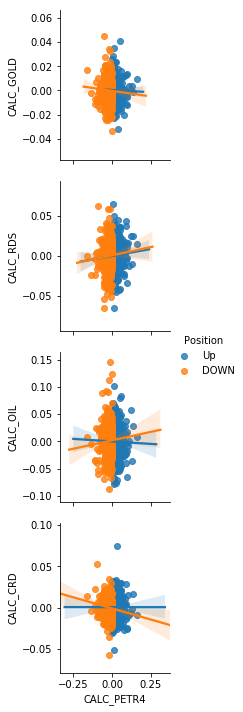

In [28]:
sns.pairplot(DADOS_OPT, hue='Position', kind="reg", x_vars=x_vars, y_vars=y_vars)

**Plot dos Histogramas**

In [32]:
X1 = df[['CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD', 'CALC_PETR4']]
X1

,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4,Position
Date,,,,,,
2014-11-11,0.003037,0.005798,0.006977,0.001841,0.007857,Up
2014-11-12,-0.003745,-0.018381,-0.009751,0.003519,-0.036145,DOWN
2014-11-13,0.000800,-0.006968,-0.038481,0.008728,-0.029412,DOWN
2014-11-14,0.019338,0.014179,0.021695,0.004983,-0.045455,DOWN
2014-11-17,-0.001489,-0.001874,-0.002374,0.002421,-0.011905,DOWN
2014-11-18,0.009264,0.011264,-0.013617,-0.009816,0.026506,Up
2014-11-19,-0.001634,-0.001428,-0.000402,-0.004066,0.059468,Up
2014-11-20,-0.003506,0.015301,0.013408,0.000428,0.056130,Up
2014-11-21,0.005473,0.011268,0.012305,-0.022463,-0.006294,DOWN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207210E3C88>,
      dtype=object)

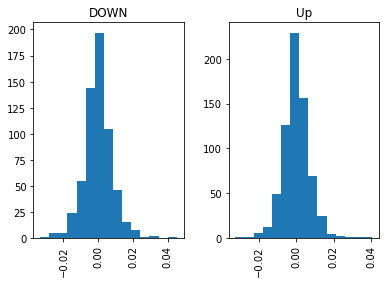

In [33]:
hist_1 = X1.hist(column="CALC_PETR4", by="CALC_GOLD", bins=15)
hist_1

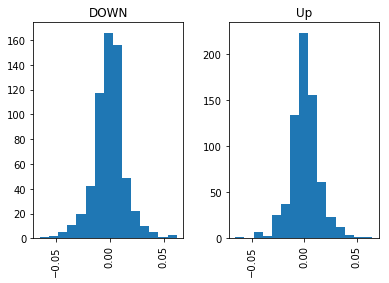

In [34]:
hist_2 = X1.hist(column="CALC_PETR4", by="CALC_RDS", bins=15)

In [ ]:
hist_3 = X1.hist(column="CALC_PETR4", by="CALC_OIL", bins=15)

In [ ]:
hist_4 = X1.hist(column="CALC_PETR4", by="CALC_CRD", bins=15)